In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load Pittsburgh arrest data
arrest_data = pd.read_csv("arrest_data.tsv", sep="\t")
arrest_data

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51478,2042082,21177644,65.0,M,W,2021-10-25T17:57:00,"2800 Block Murray AV Pittsburgh, PA 15217",2706 Terroristic Threats. / 2710 Ethnic Intimi...,"2800 Block Murray AV Pittsburgh, PA 15217",Squirrel Hill South,4,1414.0,NaN,NaN,0.000000,0.000000
51479,2042083,21018883,16.0,M,B,2021-10-14T18:30:00,"3100 Block Bergman ST Pittsburgh, PA 15204",2706 Terroristic Threats.,"2900 Block Merwyn AV Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.050424,40.455730
51480,2042084,21059997,16.0,M,B,2021-10-14T18:20:00,"3100 Block Bergman ST Pittsburgh, PA 15204",2701 Simple Assault. / 2705 Recklessy Endanger...,"3100 Block Bergman ST Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.054871,40.456894
51481,2042085,21163161,16.0,M,B,2021-10-17T12:30:00,"600 Block 1st AV Pittsburgh, PA 15219",2702 Aggravated Assault.,"1500 Block Beechview AV Pittsburgh, PA 15216",Beechview,6,1916.0,4.0,5.0,-80.025139,40.412876


In [3]:
# plot data
data = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts()
data

Central Business District    3155
South Side Flats             2665
Carrick                      1841
East Allegheny               1707
Homewood South               1673
                             ... 
Regent Square                  26
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

* x axis should show neighborhoods
* y axis should show number of times each neighborhood appears

Creating a map of where arrests occurred

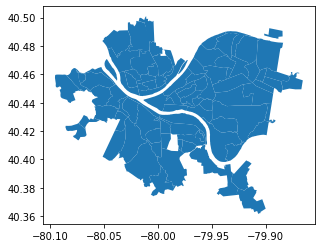

In [4]:
# get the blank map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [5]:
# neighborhood data
value = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts()
value = pd.DataFrame(value)
value

,INCIDENTNEIGHBORHOOD
Central Business District,3155
South Side Flats,2665
Carrick,1841
East Allegheny,1707
Homewood South,1673
...,...
Regent Square,26
Central Northside,23
Mt. Oliver Boro,17
Troy Hill-Herrs Island,6


In [6]:
# merge the neighborhood data with the map
incidents_map = neighborhoods.merge(value, how='left', left_on='hood', right_on=value.index)
incidents_map[['hood', 'INCIDENTNEIGHBORHOOD','geometry']].head()

,hood,INCIDENTNEIGHBORHOOD,geometry
0,Central Oakland,406.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,338.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,244.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,653.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,385.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


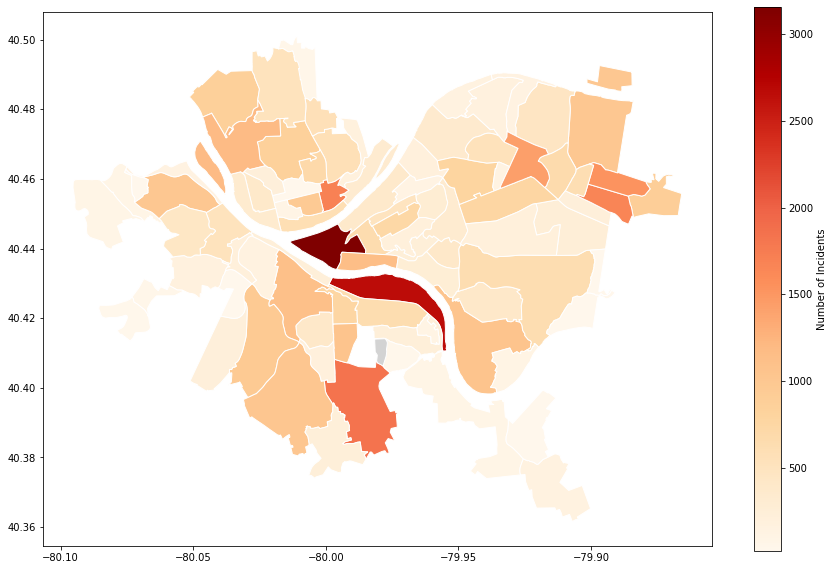

In [7]:
# Map of where arrests occurred
incidents_map.plot(column='INCIDENTNEIGHBORHOOD', 
                  cmap='OrRd',
                  edgecolor="white",
                  legend=True,
                  legend_kwds={'label': "Number of Incidents"},
                  figsize=(15, 10),
                  missing_kwds={"color": "lightgrey"}
                  )

Graphing arrest data

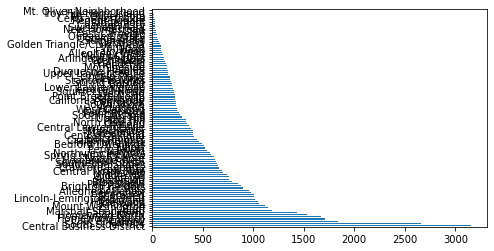

In [15]:
# unchanged neighborhood arrest data
data.plot(kind='barh')

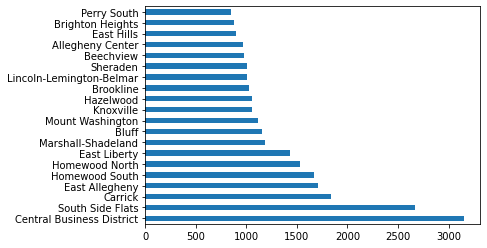

In [16]:
# 20 neighborhoods with most arrests
data.head(20).plot(kind='barh')

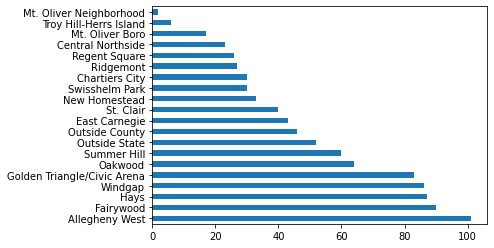

In [21]:
# 20 neighborhoods with the fewest arrests
data.tail(20).plot(kind='barh')

Mt Oliver Borough
* Very few arrests (17)
* Very few appearances on police blotter
* Fewest 311 calls

Graphing arrest data in Mt. Oliver Borough

In [11]:
# all offenses from arrests in Mt. Oliver Borough
query_mask = arrest_data['INCIDENTNEIGHBORHOOD'] == "Mt. Oliver Boro"
mt_oliver_boro = arrest_data[query_mask]
mt_oliver_boro["OFFENSES"].value_counts()

903 Criminal Conspiracy. / 2701 Simple Assault.                                                                                                                                                                                                                      3
13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(30)* Delivery of Controlled Substance                                                                                                             1
3925 Receiving Stolen Property. / 6106 Firearms not to be Carried without a License. / 1501 Drivers Required to be Licensed. / 3334 Turning Movements and Required Signals. / 13(a)(16) Possession of Controlled Substance / 6110.1 Possesion of Firearm by Minor    1
4101 Forgery. / 4105(a)(1) Bad Checks                                                                                                                                                                              

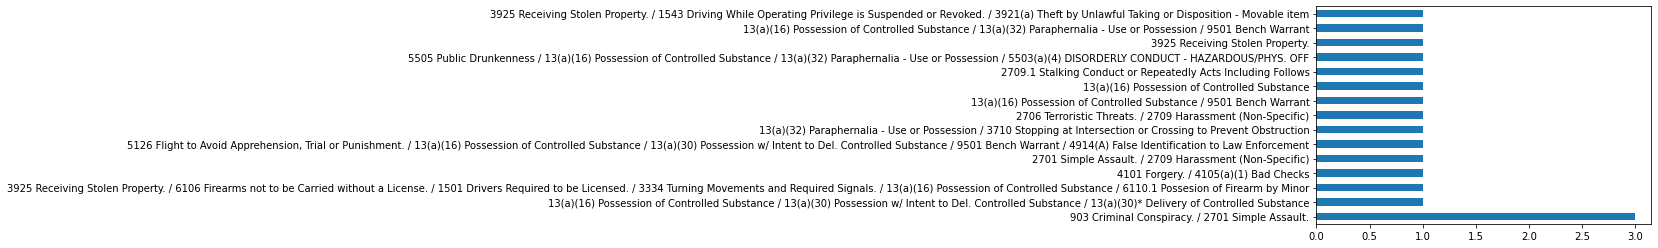

In [13]:
# Offenses in Mt. Oliver as a bar graph
mt_oliver_boro["OFFENSES"].value_counts().plot(kind='barh')

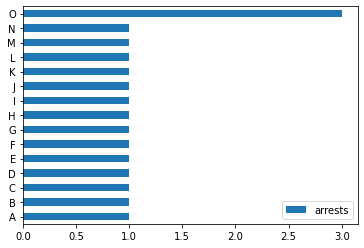

In [14]:
# Use new DataFrame to simplify bar graph
plot_data = pd.DataFrame(
            {"arrests": [1,1,1,1,1,1,1,1,1,1,1,1,1,1,3]},
            index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M","N","O"])
plot_data.plot(kind="barh")

Key for bar graph above
* A: 13(a)(32) Paraphernalia - Use or Possession / 3710 Stopping at Intersection or Crossing to Prevent Obstruction
* B: 5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF
* C: 3925 Receiving Stolen Property. / 1543 Driving While Operating Privilege is Suspended or Revoked. / 3921(a) Theft by Unlawful Taking or Disposition - Movable item
* D: 3925 Receiving Stolen Property.
* E: 5126 Flight to Avoid Apprehension, Trial or Punishment. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 9501 Bench Warrant / 4914(A) False Identification to Law Enforcement                          1
3925 Receiving Stolen Property. 
* F: 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant
* G: 2701 Simple Assault. / 2709 Harassment (Non-Specific)
* H: 13(a)(16) Possession of Controlled Substance
* I: 4101 Forgery. / 4105(a)(1) Bad Checks
* J: 3925 Receiving Stolen Property. / 6106 Firearms not to be Carried without a License. / 1501 Drivers Required to be Licensed. / 3334 Turning Movements and Required Signals. / 13(a)(16) Possession of Controlled Substance / 6110.1 Possesion of Firearm by Minor    1
4101 Forgery. / 4105(a)(1) Bad Checks
* K: 2709.1 Stalking Conduct or Repeatedly Acts Including Follows
* L: 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(30)* Delivery of Controlled Substance
* M: 13(a)(16) Possession of Controlled Substance / 9501 Bench Warrant
* N: 2706 Terroristic Threats. / 2709 Harassment (Non-Specific)  
* O: 903 Criminal Conspiracy. / 2701 Simple Assault.
